In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
train = pd.read_csv("Car_sales.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [29]:
train = train.dropna()

In [30]:
train["Sales_in_thousands"] = train["Sales_in_thousands"].apply(round)
train["Sales_in_thousands"].head()
train["Horsepower"] = train["Horsepower"].apply(round)
train["Horsepower"].head()

0    140
1    225
3    210
4    150
5    200
Name: Horsepower, dtype: int64

In [31]:
X = train['Sales_in_thousands'].values
y = train['Horsepower'].values


In [32]:
X=X.reshape(-1,1)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (93, 1)
y_train shape (93,)
X_test shape (24, 1)
y_test shape (24,)
[120 140 110 119 195 132 300 170 120 175 205 220 200 200 230 170 210 205
 163 125 132 185 190 205]


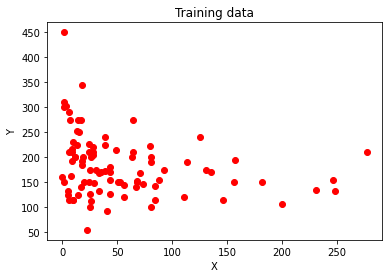

In [34]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data')
plt.show()

In [35]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 6.42 %
Test accuracy -56.34 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

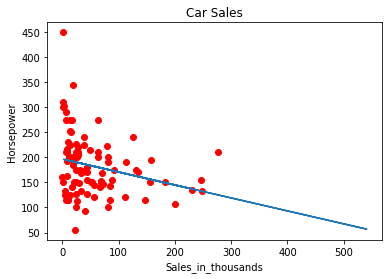

In [36]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Sales_in_thousands")
plt.ylabel("Horsepower")
plt.title("Car Sales")
plt.plot

The higher the horsepower, the less sales there are. It seems the most sales where for a car with between 200-250 HP.  The average horsepower for cars sold are between 100-250.